<a href="https://colab.research.google.com/github/jgr11082003/CODEALPHA_DATASCIENCE/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (1).zip to archive (1) (1).zip


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


None

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Using 'Sales' column as the target variable.
MAE: 0.7471213185787201
MSE: 0.9406307859303684
RMSE: 0.9698612199332276
R2 Score: 0.970198869197828


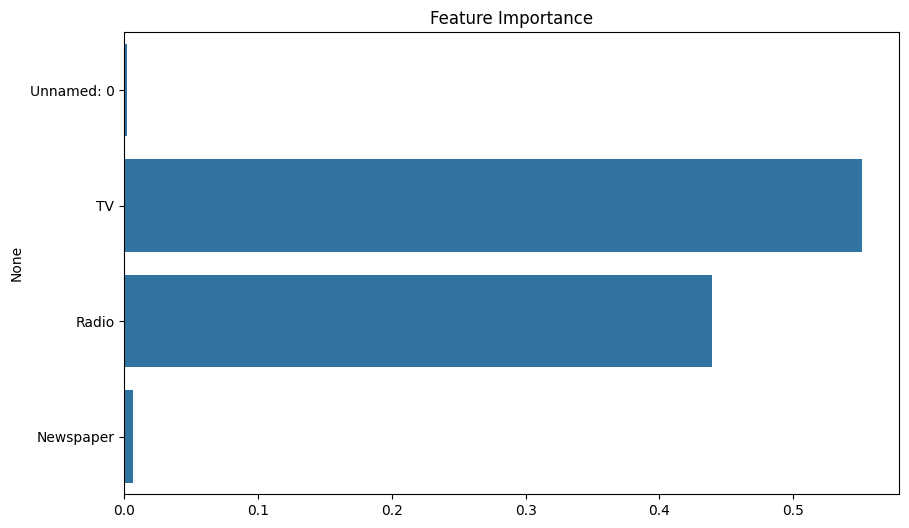

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import zipfile
import os
from google.colab import files


uploaded = files.upload()

zip_file_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("./data")

data_folder = "./data"
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]
df = pd.read_csv(os.path.join(data_folder, csv_files[0]))


display(df.head())
display(df.info())
display(df.describe())


df.dropna(inplace=True)


label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


if 'price' in df.columns:
    X = df.drop(columns=['price'])
    y = df['price']
else:

    possible_target_columns = ['Sales', 'sales', 'revenue', 'target']
    for col in possible_target_columns:
        if col in df.columns:
            print(f"Using '{col}' column as the target variable.")
            X = df.drop(columns=[col])
            y = df[col]
            break
    else:
        raise KeyError("Could not find the target variable column. Please check the data file.")



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


plt.figure(figsize=(10, 6))
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.show()